In [44]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams["figure.figsize"]=(16,8)
matplotlib.rcParams.update({"font.size": 22})
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import norm, t, gaussian_kde
from scipy import stats
from sklearn.neighbors import KernelDensity

In [139]:
ibov=yf.download("^BVSP",progress=False)[["Adj Close"]]
ibov=ibov.resample("6D").sum() # AQUI VOCÊ ALTERA PARA O VENCIMENTO DA SUA ESTRUTURA COM OPÇÕES
ibov["retorno"]=ibov["Adj Close"].pct_change()
ibov=ibov.dropna()
ibov

,Adj Close,retorno
Date,,
1993-05-03,125.000000,0.293996
1993-05-09,133.400000,0.067200
1993-05-15,120.699999,-0.095202
1993-05-21,136.400002,0.130075
1993-05-27,106.900002,-0.216276
...,...,...
2021-06-29,507417.000000,-0.010163
2021-07-05,504462.000000,-0.005824
2021-07-11,637597.000000,0.263915


In [113]:
media_ibov=ibov["retorno"].mean()
std_ibov=ibov["retorno"].std()
# filtrando quedas superiores a 5%
ibov[ibov["retorno"]<=-0.05]

,Adj Close,retorno
Date,,
1993-10-18,171.399994,-0.095037
1993-10-20,166.000000,-0.060555
1993-10-21,150.300003,-0.094578
1993-10-25,156.100006,-0.064709
1994-02-18,944.900024,-0.092228
...,...,...
2020-03-18,66895.000000,-0.103488
2020-03-23,63570.000000,-0.052170
2020-03-27,73429.000000,-0.055089


In [140]:
#probabilidade considerando uma distribuição normal do ativo cair 5%, lembrando que ela não deve ser usada no mercado, JÁ MOSTRAREMOS O MOTIVO
pop=norm.cdf(-0.05,loc=media_ibov,scale=std_ibov)
freq=1/pop
print(f"1x for each {freq:.0f} days")
print(f"probability of {pop*100:.2f}%")

1x for each 91 days
probability of 1.10%


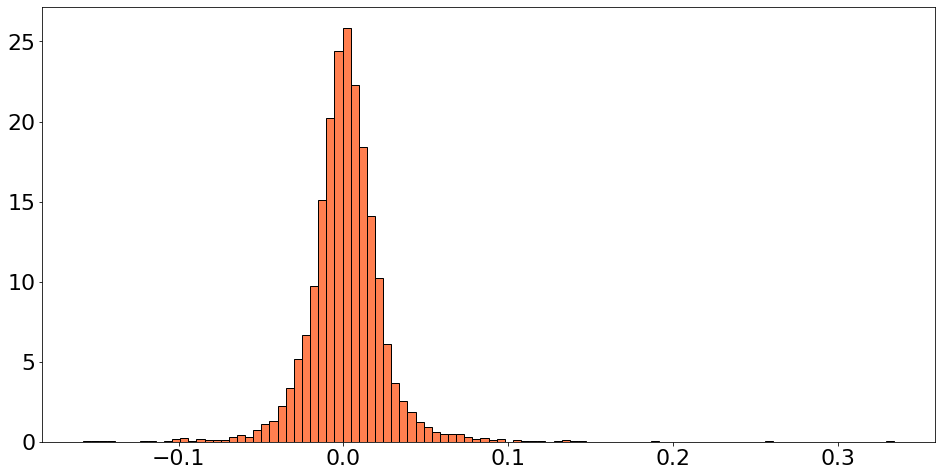

In [141]:
count, bins, patches = plt.hist(retornos, bins=100, density=True, edgecolor="black", color="coral")

<AxesSubplot:xlabel='retorno', ylabel='Density'>

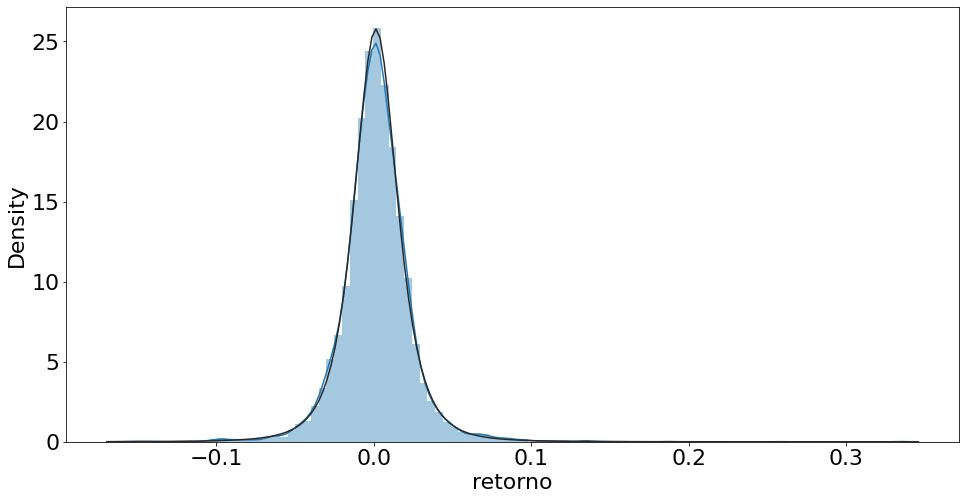

In [120]:
# uma distribuição T- Student se aproxima mais da realidade
sns.distplot(ibov["retorno"],bins=100, kde=True,fit=t) #  a distribuição t de student explica bem, inclusive melhor que a Kernel

In [142]:
(graus_liberdade_t, media_t, std_t)= t.fit(ibov["retorno"])
print(f"Graus de Liberdade: {graus_liberdade_t:.2f}")
print(f"Média: {media_t*100:.4f}%")
print(f"Desvio Padrão: {std_t*100:.2f}%")

Graus de Liberdade: 1.55
Média: -0.0892%
Desvio Padrão: 11.60%


In [143]:
# Probabilidade do índice cair 5% em 1 dia
pop_t=t.cdf(-0.05, graus_liberdade_t, loc=media_t,scale=std_t)
print(f"Probabilidade: {pop_t*100:.2f}%")

Probabilidade: 36.16%


In [146]:
freq=1/pop_t
print(f"1x for each {freq:.2f} samples")

1x for each 2.77 samples
